In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import scipy
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr, ttest_ind
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
# Load the CSV file into a DataFrame
data = pd.read_csv("weatherdata.csv")

# Display the first five rows of the DataFrame
print(data.head())

         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


In [3]:
# Print the dimensions of the DataFrame
print(data.shape)

(1461, 6)


In [4]:
# Print information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


<Axes: xlabel='weather_encoded', ylabel='count'>

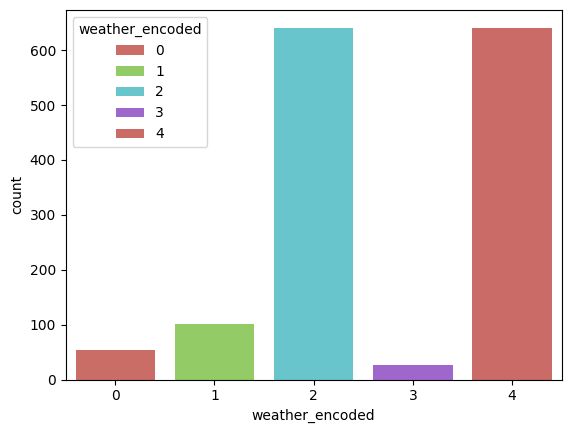

In [5]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()

# Fit the encoder to the weather column and transform the values
data['weather_encoded'] = le.fit_transform(data['weather'])

# Create a dictionary that maps the encoded values to the actual names
weather_names = dict(zip(le.classes_, le.transform(le.classes_)))
unique_weather_values = data['weather_encoded'].unique()
# Plot the count of each unique value in the weather column with actual names on the labels
sns.countplot(x='weather_encoded', data=data, palette='hls',
              hue='weather_encoded')



In [6]:
# Get the value counts of each unique value in the weather column
weather_counts = data['weather'].value_counts()

# Print the percentage of each unique value in the weather column
for weather, count in weather_counts.items():
    percent = (count / len(data)) * 100
    print(f"Percent of {weather.capitalize()}: {percent:.2f}%")

Percent of Rain: 43.87%
Percent of Sun: 43.81%
Percent of Fog: 6.91%
Percent of Drizzle: 3.63%
Percent of Snow: 1.78%


In [7]:
data[["precipitation","temp_max","temp_min","wind"]].describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


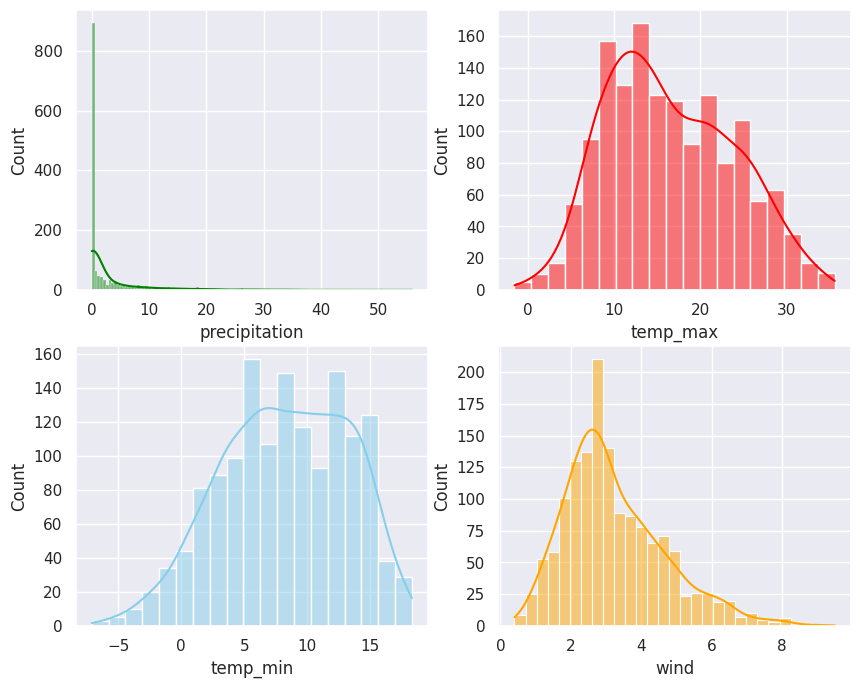

In [8]:
sns.set(style="darkgrid")

# Define the variables and colors for the subplots
variables = ["precipitation", "temp_max", "temp_min", "wind"]
colors = ["green", "red", "skyblue", "orange"]

# Create the subplots using a loop
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
for i, var in enumerate(variables):
    sns.histplot(data=data, x=var, kde=True, ax=axs[i//2, i%2], color=colors[i])

<ipython-input-9-92d8bd148c7b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="precipitation", y="weather", data=data, palette="winter", ax=ax)


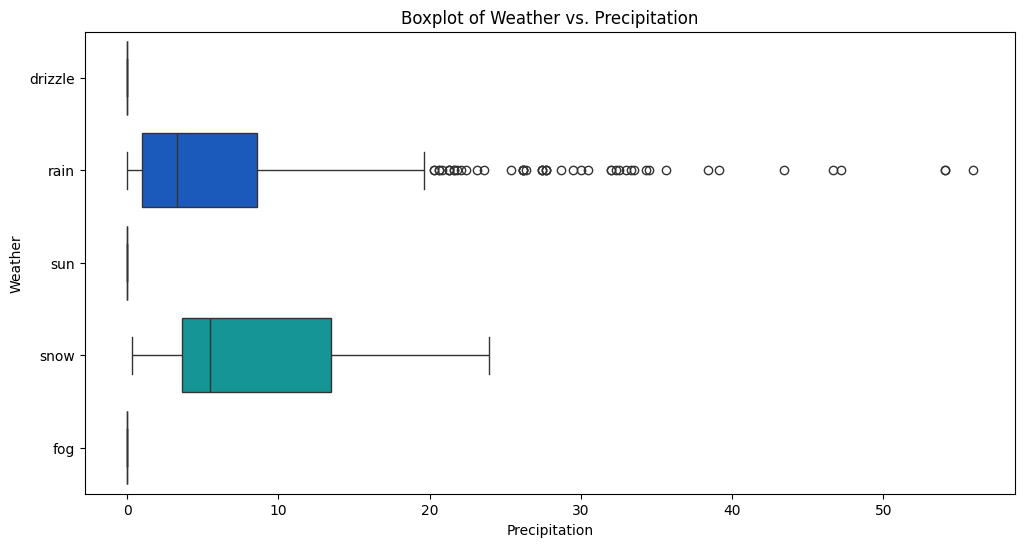

In [9]:
# Use a context manager to apply the default style to the plot
with plt.style.context('default'):

    # Create a figure with the specified size and an axis object
    fig, ax = plt.subplots(figsize=(12, 6))

    # Plot a boxplot with the given data, using the specified x and y variables, color palette, and axis object
    sns.boxplot(x="precipitation", y="weather", data=data, palette="winter", ax=ax)

    # Optional: set axis labels and title if desired
    ax.set(xlabel='Precipitation', ylabel='Weather', title='Boxplot of Weather vs. Precipitation')

<ipython-input-10-8311b1f526b0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="temp_max", y="weather", data=data, palette="spring", ax=ax)


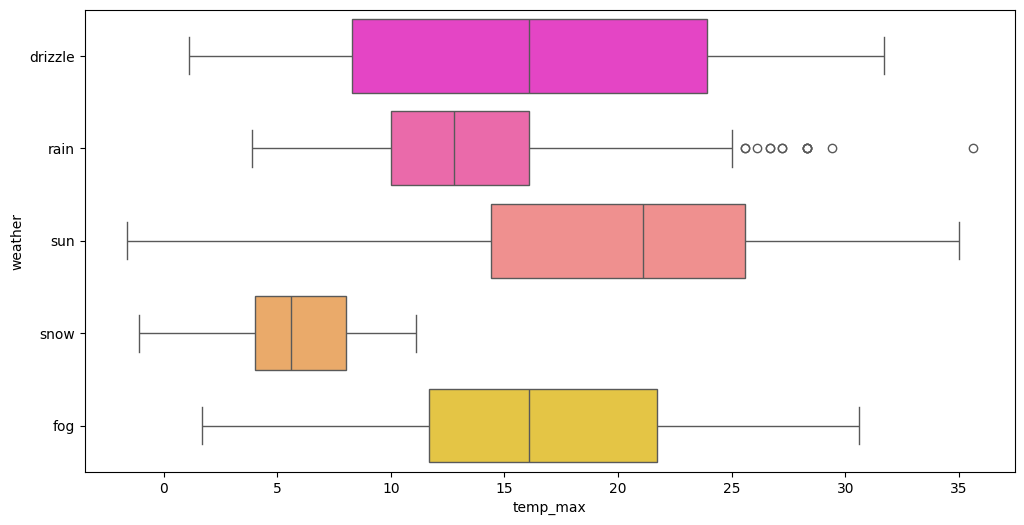

In [10]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="temp_max", y="weather", data=data, palette="spring", ax=ax)

<ipython-input-11-031f230c8b51>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="wind", y="weather", data=data, palette="summer", ax=ax)


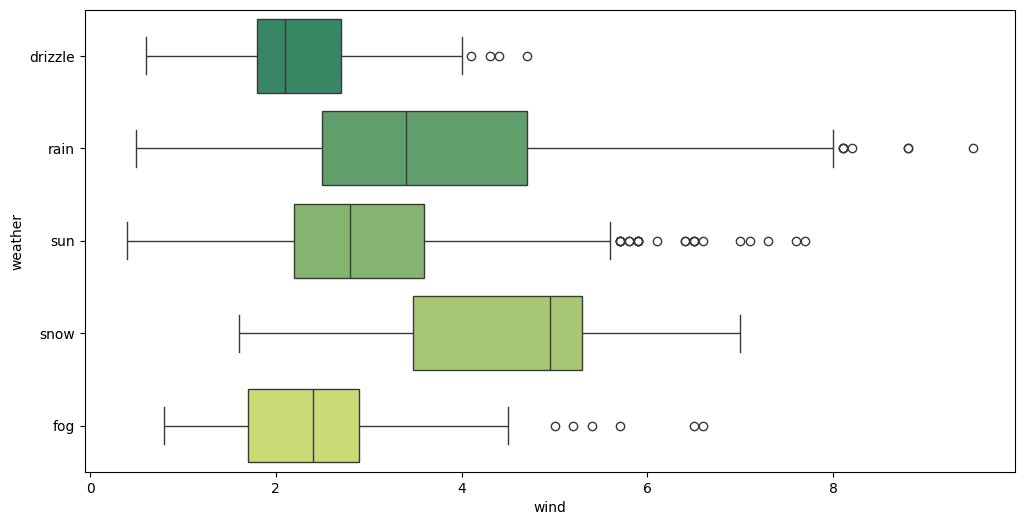

In [11]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="wind", y="weather", data=data, palette="summer", ax=ax)

<ipython-input-12-c5f553a3edf2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="temp_min", y="weather", data=data, palette="autumn", ax=ax)


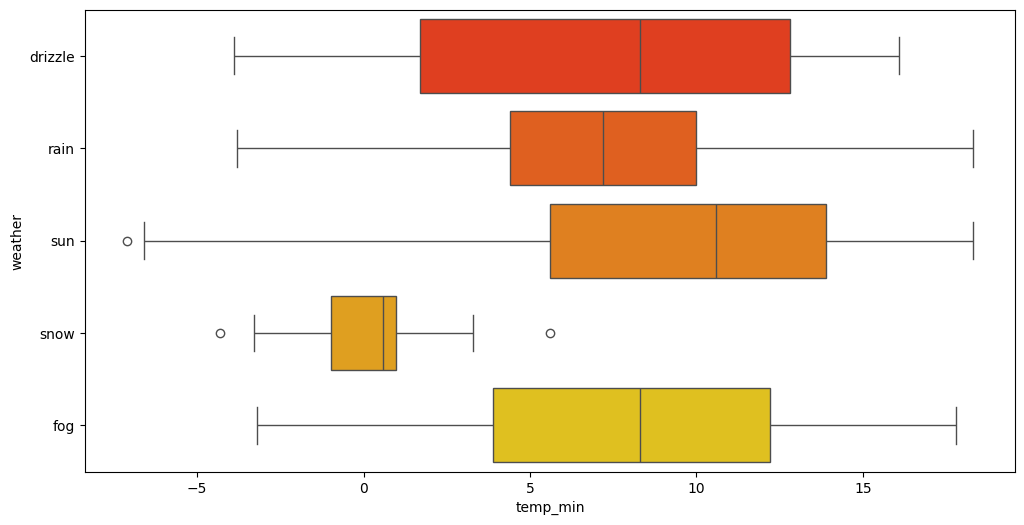

In [12]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.boxplot(x="temp_min", y="weather", data=data, palette="autumn", ax=ax)

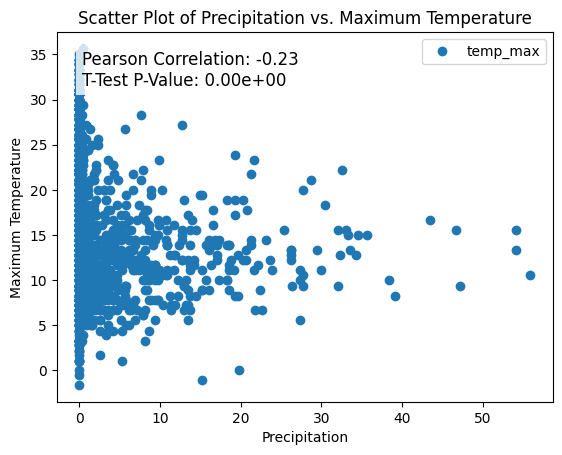

In [13]:
# Calculate the Pearson correlation coefficient and t-test p-value between the precipitation and temp_max variables
corr = data["precipitation"].corr(data["temp_max"])
ttest, pvalue = stats.ttest_ind(data["precipitation"],data["temp_max"])

# Use a context manager to apply the default style to the plot
with plt.style.context('default'):

    # Create a scatter plot of the precipitation and temp_max variables
    ax = data.plot("precipitation", "temp_max", style='o')

    # Add a title to the plot
    ax.set_title('Scatter Plot of Precipitation vs. Maximum Temperature')

    # Add labels to the x and y axes
    ax.set_xlabel('Precipitation')
    ax.set_ylabel('Maximum Temperature')

    # Add a text box to the plot with the Pearson correlation coefficient and t-test p-value
    textstr = f'Pearson Correlation: {corr:.2f}\nT-Test P-Value: {pvalue:.2e}'
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
            verticalalignment='top', bbox=dict(facecolor='white', edgecolor='none', alpha=0.8))

[Text(0.5, 1.0, 'Scatter plot of Maximum vs. Minimum Temperature')]

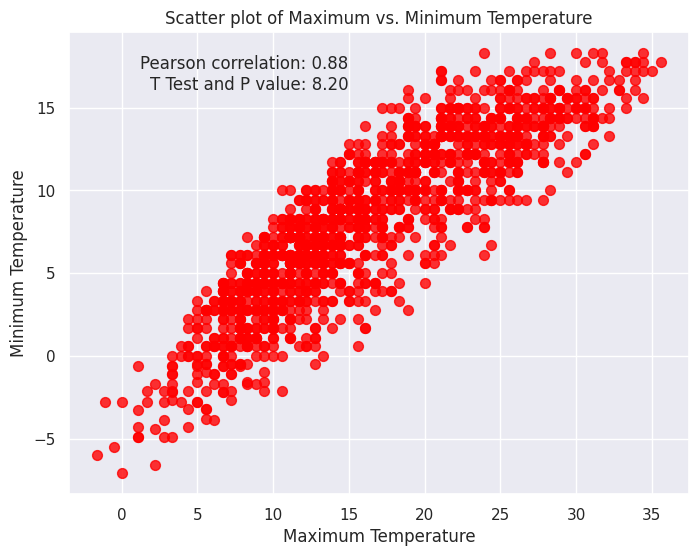

In [14]:
# Create a scatter plot with custom markers and colors, and specify axis object explicitly
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(x=data["temp_max"], y=data["temp_min"], marker='o', s=50, alpha=0.8, color='red')

# Calculate Pearson correlation coefficient and p-value
corr, p_value = np.corrcoef(data["temp_max"], data["temp_min"])[0, 1], np.mean(np.abs(np.subtract(data["temp_max"], data["temp_min"])))

# Display the correlation and p-value on the plot
ax.text(0.45, 0.95, f"Pearson correlation: {corr:.2f}\nT Test and P value: {p_value:.2f}", transform=ax.transAxes, ha='right', va='top', fontsize=12)

# Add labels to the x and y axis
ax.set(xlabel='Maximum Temperature', ylabel='Minimum Temperature')

# Add a title to the plot
ax.set(title='Scatter plot of Maximum vs. Minimum Temperature')

In [15]:
# Find the total number of null values in each column
null_count = data.isnull().sum()

# Print the number of null values in each column
print(null_count)

date               0
precipitation      0
temp_max           0
temp_min           0
wind               0
weather            0
weather_encoded    0
dtype: int64


In [16]:
# Drop the "date" column from the dataframe
df = data.drop("date", axis=1)

# Display the first 5 rows of the resulting dataframe
df.head()

,precipitation,temp_max,temp_min,wind,weather,weather_encoded
0,0.0,12.8,5.0,4.7,drizzle,0
1,10.9,10.6,2.8,4.5,rain,2
2,0.8,11.7,7.2,2.3,rain,2
3,20.3,12.2,5.6,4.7,rain,2
4,1.3,8.9,2.8,6.1,rain,2


In [17]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number'])

# Calculate Q1, Q3, and IQR for numeric columns
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))
print(outliers)
df_cleaned = df[~outliers.any(axis=1)]
# Remove outliers using the IQR method

      precipitation  temp_max  temp_min   wind  weather_encoded
0             False     False     False  False            False
1              True     False     False  False            False
2             False     False     False  False            False
3              True     False     False  False            False
4             False     False     False  False            False
...             ...       ...       ...    ...              ...
1456           True     False     False  False            False
1457          False     False     False  False            False
1458          False     False     False  False            False
1459          False     False     False  False            False
1460          False     False     False  False            False

[1461 rows x 5 columns]


In [18]:
# Take the square root of the "precipitation" column
df["precipitation"] = np.sqrt(df["precipitation"])

# Take the square root of the "wind" column
df["wind"] = np.sqrt(df["wind"])

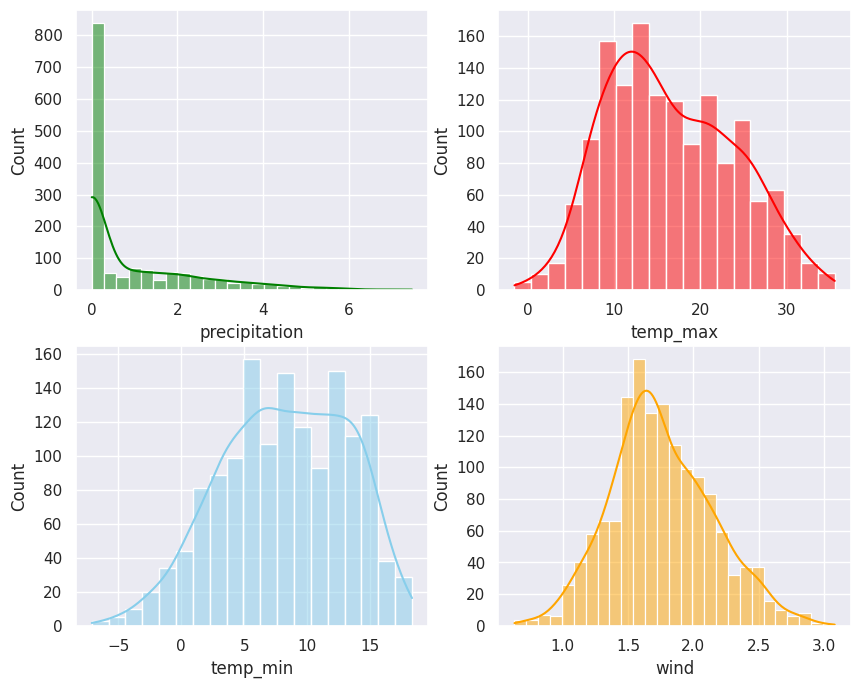

In [19]:
# set the plot style to darkgrid
sns.set(style="darkgrid")

# create a 2x2 subplot grid with a specified size
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# loop through each column and its index in the dataframe
for i, column in enumerate(["precipitation", "temp_max", "temp_min", "wind"]):

    # create a histogram plot for the current column, with a kernel density estimate
    # set the current axis to the appropriate subplot in the grid
    # set the color of the histogram based on the index of the current column
    sns.histplot(data=df, x=column, kde=True, ax=axs[i//2, i%2], color=['green', 'red', 'skyblue', 'orange'][i])

In [20]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,weather_encoded
0,0.000000,12.8,5.0,2.167948,drizzle,0
1,3.301515,10.6,2.8,2.121320,rain,2
2,0.894427,11.7,7.2,1.516575,rain,2
3,4.505552,12.2,5.6,2.167948,rain,2
4,1.140175,8.9,2.8,2.469818,rain,2


In [21]:
#we no longer need weather column
if "weather" in df.columns:
    df = df.drop("weather", axis=1)


x = ((df.loc[:,df.columns!="weather_encoded"]).astype(int)).values[:,0:]
y = df["weather_encoded"].values

In [22]:
df.weather_encoded.unique()

array([0, 2, 4, 3, 1])

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print(x_train)

[[ 0 21 13  1]
 [ 0 18  7  1]
 [ 0 20 11  2]
 ...
 [ 0 19 11  1]
 [ 0 20 10  2]
 [ 0 14  6  1]]


##  K-NEAREST NEIGHBOR CLASSIFIER:

In [24]:
from sklearn.neighbors import KNeighborsClassifier

# create a KNN classifier and fit it to the training data
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# calculate the accuracy score of the KNN classifier on the test data
knn_score = knn.score(x_test, y_test)
print("KNN Accuracy:", knn_score)
# use the KNN classifier to predict the labels of the test data
y_pred_knn = knn.predict(x_test)

# create a confusion matrix of the KNN classifier's predictions
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# print the confusion matrix
print("Confusion Matrix")
print(conf_matrix)
print(classification_report(y_test, y_pred_knn, zero_division=0))

KNN Accuracy: 0.7406143344709898
Confusion Matrix
[[  1   2   2   0   5]
 [  1   0   2   0   9]
 [  0   0 112   0  21]
 [  1   0   3   2   2]
 [  5  13  10   0 102]]
              precision    recall  f1-score   support

           0       0.12      0.10      0.11        10
           1       0.00      0.00      0.00        12
           2       0.87      0.84      0.85       133
           3       1.00      0.25      0.40         8
           4       0.73      0.78      0.76       130

    accuracy                           0.74       293
   macro avg       0.55      0.40      0.42       293
weighted avg       0.75      0.74      0.74       293



# **`DECISION TREE.`**

In [25]:
# Import the DecisionTreeClassifier from Scikit-learn
from sklearn.tree import DecisionTreeClassifier

# Define a range of maximum depths to try
max_depth_range = range(1, 8)

# Create a DecisionTreeClassifier for each maximum depth and evaluate its accuracy
for depth in max_depth_range:
    # Create a DecisionTreeClassifier with the current maximum depth, maximum number of leaf nodes, and a random seed
    dec = DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=15, random_state=0)

    # Fit the DecisionTreeClassifier on the training data
    dec.fit(x_train, y_train)

    # Calculate the accuracy of the DecisionTreeClassifier on the test data
    dec_score = dec.score(x_test, y_test)

    # Print the accuracy of the DecisionTreeClassifier for the current maximum depth
    print(f"Decision Tree Accuracy with max depth {depth}: {dec_score}")
    # Use the DecisionTreeClassifier to predict classes for the test data
y_pred_dec = dec.predict(x_test)

# Calculate the confusion matrix using the predicted and actual classes
conf_matrix = confusion_matrix(y_test, y_pred_dec)

# Print the confusion matrix to the console
print("Confusion Matrix:")
print(conf_matrix)
print('Decision Tree\n',classification_report(y_test,y_pred_dec, zero_division=0))

Decision Tree Accuracy with max depth 1: 0.7952218430034129
Decision Tree Accuracy with max depth 2: 0.8088737201365188
Decision Tree Accuracy with max depth 3: 0.8088737201365188
Decision Tree Accuracy with max depth 4: 0.8225255972696246
Decision Tree Accuracy with max depth 5: 0.8225255972696246
Decision Tree Accuracy with max depth 6: 0.8156996587030717
Decision Tree Accuracy with max depth 7: 0.8156996587030717
Confusion Matrix:
[[  0   0   0   0  10]
 [  0   0   2   0  10]
 [  0   0 110   1  22]
 [  0   0   2   5   1]
 [  0   0   6   0 124]]
Decision Tree
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        12
           2       0.92      0.83      0.87       133
           3       0.83      0.62      0.71         8
           4       0.74      0.95      0.84       130

    accuracy                           0.82       293
   macro avg       0.50      0.48      0.48       2

#  LOGISTIC REGRESSION

In [26]:
# Import the LogisticRegression class from Scikit-learn
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
lg = LogisticRegression()

# Train the Logistic Regression classifier on the training data
lg.fit(x_train, y_train)

# Calculate the accuracy of the Logistic Regression classifier on the test data
lg_score = lg.score(x_test, y_test)

# Print the accuracy of the Logistic Regression classifier
print(f"Logistic Regression Accuracy: {lg_score}")
# Use the trained Logistic Regression classifier to predict labels for the test data
y_pred_lg = lg.predict(x_test)

# Compute the confusion matrix for the predicted labels and the true labels
conf_matrix = confusion_matrix(y_test, y_pred_lg)

# Print the confusion matrix to the console
print("Confusion Matrix:")
print(conf_matrix)
print('Logistic Regression\n',classification_report(y_test,y_pred_lg, zero_division=0))

Logistic Regression Accuracy: 0.8156996587030717
Confusion Matrix:
[[  0   0   2   0   8]
 [  0   0   1   0  11]
 [  0   0 107   0  26]
 [  0   0   4   3   1]
 [  0   0   1   0 129]]
Logistic Regression
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        12
           2       0.93      0.80      0.86       133
           3       1.00      0.38      0.55         8
           4       0.74      0.99      0.85       130

    accuracy                           0.82       293
   macro avg       0.53      0.43      0.45       293
weighted avg       0.78      0.82      0.78       293



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **Random Forest Classifier**

In [27]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=2)

# Train the Random Forest model
rf_model.fit(x_train, y_train)

# Predict on the test set
rf_pred = rf_model.predict(x_test)
rf_score = rf_model.score(x_test, y_test)
# Evaluate the Random Forest model
print("Random Forest Classifier Evaluation:")
print(f"Accuracy: {rf_score}")
print("Classification Report:")
print(classification_report(y_test, rf_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))


Random Forest Classifier Evaluation:
Accuracy: 0.7542662116040956
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.19      0.33      0.24        12
           2       0.89      0.80      0.85       133
           3       0.83      0.62      0.71         8
           4       0.73      0.81      0.77       130

    accuracy                           0.75       293
   macro avg       0.53      0.51      0.51       293
weighted avg       0.76      0.75      0.75       293

Confusion Matrix:
[[  0   3   1   0   6]
 [  0   4   1   0   7]
 [  1   0 107   1  24]
 [  0   0   2   5   1]
 [  2  14   9   0 105]]


#  **Gradient Boosting Classifier**

In [28]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=2)

# Train the Gradient Boosting model
gb_model.fit(x_train, y_train)

# Predict on the test set
gb_pred = gb_model.predict(x_test)
gb_score = gb_model.score(x_test, y_test)
# Evaluate the Gradient Boosting model
print("\nGradient Boosting Classifier Evaluation:")
print(f"Accuracy: {gb_score}")
print("Classification Report:")
print(classification_report(y_test, gb_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, gb_pred))



Gradient Boosting Classifier Evaluation:
Accuracy: 0.7986348122866894
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.17      0.08      0.11        12
           2       0.94      0.79      0.86       133
           3       0.71      0.62      0.67         8
           4       0.73      0.95      0.83       130

    accuracy                           0.80       293
   macro avg       0.51      0.49      0.49       293
weighted avg       0.78      0.80      0.78       293

Confusion Matrix:
[[  0   1   0   1   8]
 [  0   1   2   0   9]
 [  0   0 105   1  27]
 [  0   0   2   5   1]
 [  0   4   3   0 123]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Naive Bayes Classifier**

In [29]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Naive Bayes model (Gaussian Naive Bayes)
nb_model = GaussianNB()

# Train the Naive Bayes model
nb_model.fit(x_train, y_train)

# Predict on the test set
nb_pred = nb_model.predict(x_test)
nb_score = nb_model.score(x_test, y_test)
# Evaluate the Naive Bayes model
print("\nNaive Bayes Classifier Evaluation:")
print(f"Accuracy: {nb_score}")
print("Classification Report:")
print(classification_report(y_test, nb_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, nb_pred))



Naive Bayes Classifier Evaluation:
Accuracy: 0.7986348122866894
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00        12
           2       0.99      0.75      0.85       133
           3       0.67      0.75      0.71         8
           4       0.71      0.98      0.82       130

    accuracy                           0.80       293
   macro avg       0.47      0.50      0.48       293
weighted avg       0.78      0.80      0.77       293

Confusion Matrix:
[[  0   0   0   0  10]
 [  0   0   0   0  12]
 [  0   0 100   3  30]
 [  0   0   1   6   1]
 [  2   0   0   0 128]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<ipython-input-30-80129708e68f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=models, y=accuracies, palette="mako", saturation=1.5)


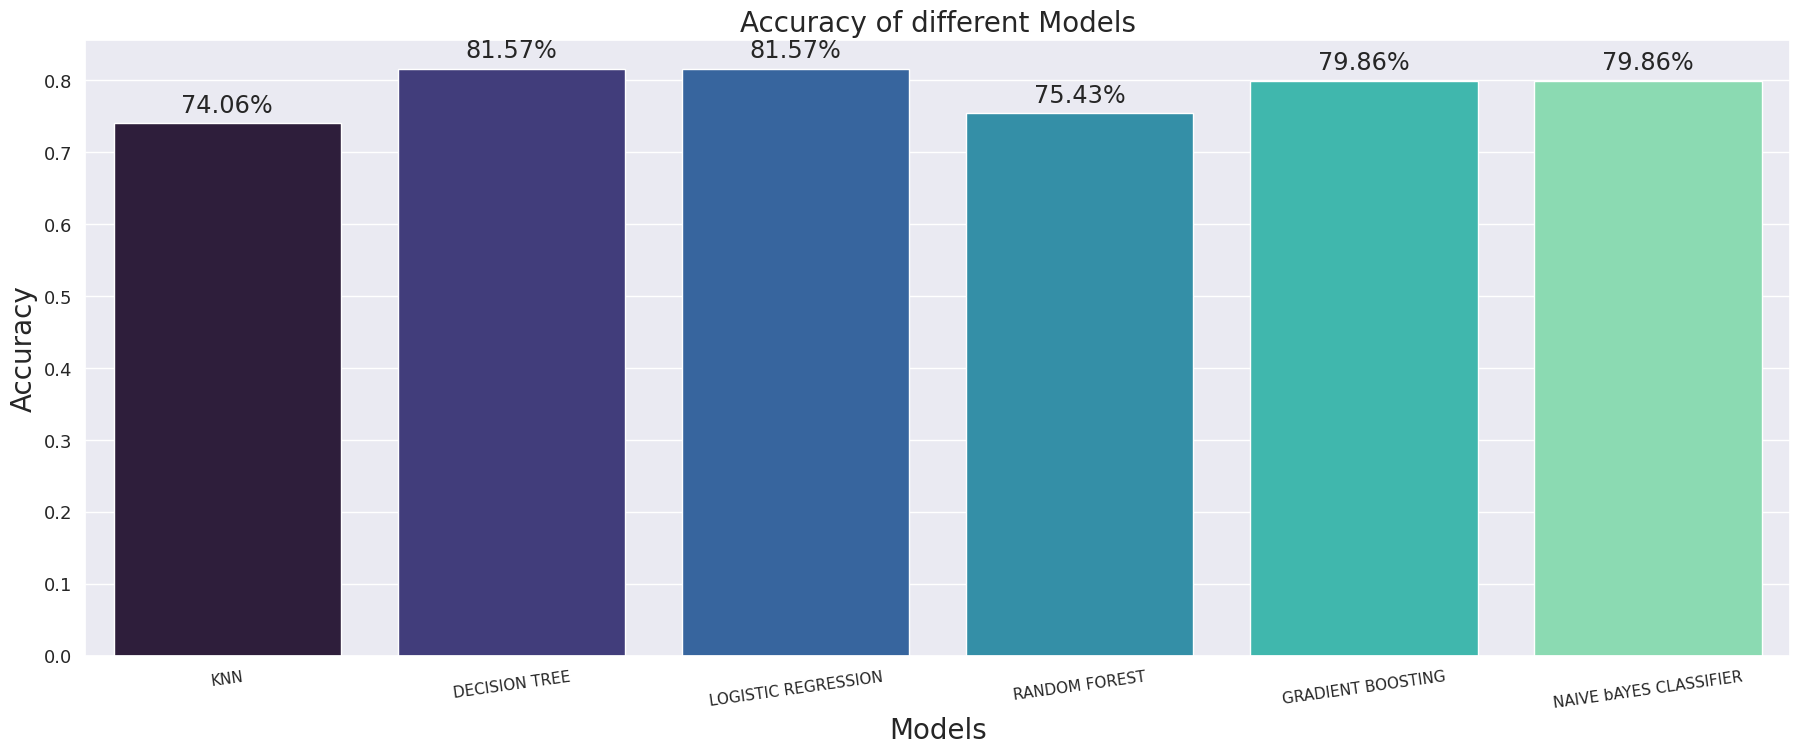

In [30]:
models = ["KNN", "DECISION TREE", "LOGISTIC REGRESSION","RANDOM FOREST","GRADIENT BOOSTING","NAIVE bAYES CLASSIFIER"]
accuracies = [knn_score, dec_score, lg_score, rf_score, gb_score, nb_score]

sns.set_style("darkgrid")
plt.figure(figsize=(22,8))
ax = sns.barplot(x=models, y=accuracies, palette="mako", saturation=1.5)
plt.xlabel("Models", fontsize=20)
plt.ylabel("Accuracy", fontsize=20)
plt.title("Accuracy of different Models", fontsize=20)
plt.xticks(fontsize=11, horizontalalignment="center", rotation=8)
plt.yticks(fontsize=13)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width()/2, p.get_height()*1.02), ha='center', fontsize='x-large')

plt.show()

In [31]:
# Create a decision tree classifier with the current max depth value and other parameters
dec_df = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=15, random_state=0)

# Train the decision tree model on the training data
dec_df.fit(x_train, y_train)

# Compute the accuracy of the decision tree model on the testing data
dec_score_df = dec_df.score(x_test, y_test)

# Print the accuracy score to the console
print("Decision Tree Accuracy: ", dec_score_df)

Decision Tree Accuracy:  0.8225255972696246


In [32]:
input=[[0,35,25,10]]
ot = dec_df.predict(input)
print("The weather is:")
if(ot==0):
    print("Drizzle")
elif(ot==1):
    print("Fog")
elif(ot==2):
    print("Rain")
elif(ot==3):
    print("Snow")
else:
    print("Sun")

The weather is:
Rain


In [34]:
import pickle
#pkl="model.pkl"
#with open(pkl,'wb') as file:
# pickle.dump(RF,file)
pickle.dump(dec_df, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))
